<a href="https://colab.research.google.com/github/KunalDM1999/Task-1-Data-Cleaning-Preprocessing/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **loding data**

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('/content/Titanic-Dataset.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# **exploring data**

In [204]:
data.info()
data.describe(include=[np.number])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**finding mean and medin line on distribution plot to fill null values of age column**

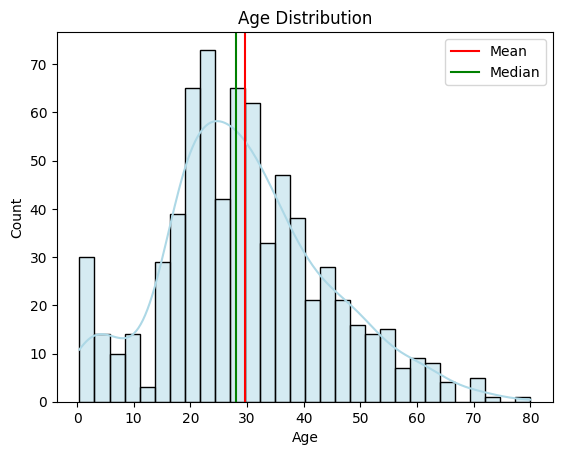

In [205]:
# Histogram with mean and median lines
sns.histplot(data['Age'], bins=30, kde=True, color='lightblue')
plt.axvline(data['Age'].mean(), color='red', label='Mean')
plt.axvline(data['Age'].median(), color='green', label='Median')
plt.title('Age Distribution')
plt.legend()
plt.show()

**Handle missing values**


1.   droping Cabin column  due to too many missing values
2.   replacing missing values of age aand embarked column with median and mode values  



In [206]:
# Drop 'Cabin' due to too many missing values
data.drop(columns='Cabin', inplace=True)

#  fill missing values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Confirm no missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


**extracting titles of names from name column and generate new colimn to get importent information which name column don't give**

In [207]:
print(data['Name'].head())
data['Title'] = data['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
print(data['Title'].value_counts())
data.drop(columns='Name', inplace=True)
data['Title'].info()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object
Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Title
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


**combine some rare titles to reduce the number of titles also correct the simillar title to same as same type**  

In [208]:
# Replace rare titles with 'Rare'
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Don', 'Lady', 'Sir', 'Capt', 'the Countess', 'Jonkheer']
data['Title'] = data['Title'].replace(rare_titles, 'Rare')

# Merge similar titles into common ones
data['Title'] = data['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})
data['Title'].value_counts()

,count
Title,
Mr,517
Miss,185
Mrs,126
Master,40
Rare,23


**exploring the data in severl feture**

In [209]:
print(data['Ticket'].value_counts())
print(data['Sex'].value_counts())
print(data['Embarked'].value_counts())

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


**generating new feture**

In [210]:
# Encode ticket frequency as a new feature
data['Ticket_Freq'] = data['Ticket'].map(data['Ticket'].value_counts())
data.drop(columns='Ticket', inplace=True)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Ticket_Freq
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,1
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,1
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,1
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,2
4,5,0,3,male,35.0,0,0,8.0500,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,Rare,1
887,888,1,1,female,19.0,0,0,30.0000,S,Miss,1
888,889,0,3,female,28.0,1,2,23.4500,S,Miss,2
889,890,1,1,male,26.0,0,0,30.0000,C,Mr,1


In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Title        891 non-null    object 
 10  Ticket_Freq  891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


# **Encoding**.

1.   Ordinal Encoding for sex feature
2.   OneHot Encoding for Title and Embarked feature



In [213]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
# Binary encode 'Sex'
oe = OrdinalEncoder()
data['Sex'] = oe.fit_transform(data[['Sex']]).astype(int)

# Initialize OneHotEncoder
categorical_cols = ['Title', 'Embarked']
ohe = OneHotEncoder( drop=None)

# Fit and transform the data
encoded = ohe.fit_transform(data[categorical_cols])
encoded_dense = encoded.toarray()

# DataFrame with encoded column names using the dense array
encoded_df = pd.DataFrame(encoded_dense, columns=ohe.get_feature_names_out(categorical_cols), index=data.index)

# Drop original columns
data = data.drop(columns=categorical_cols)
data = pd.concat([data, encoded_df], axis=1)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_Freq,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,0,38.0,1,0,71.2833,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3,1,3,0,26.0,0,0,7.9250,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,0,35.0,1,0,53.1000,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5,0,3,1,35.0,0,0,8.0500,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
887,888,1,1,0,19.0,0,0,30.0000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
888,889,0,3,0,28.0,1,2,23.4500,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
889,890,1,1,1,26.0,0,0,30.0000,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# **exploring some nemurivl features**

In [214]:
print(data['Survived'].value_counts())
print(data['Pclass'].value_counts())


Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [219]:
# Check for non-positive values in 'Age'
age_non_positive = data[data['Age'] <= 0]
print(f"\nRows with non-positive Age values: {len(age_non_positive)}")
if not age_non_positive.empty:
    print(age_non_positive[['Age']].head())

# Check for negative values in 'Fare'
fare_negative = data[data['Fare'] <= 0]
print(f"\nRows with negative Fare values: {len(fare_negative)}")
if not fare_negative.empty:
    print(fare_negative[['Fare']].head())

# Find the minimum value in 'Age'
min_age = data['Age'].min()
print(f"\nMinimum value in Age column: {min_age}")

# Find the minimum value in 'Fare'
min_fare = data['Fare'].min()
print(f"\nMinimum value in Fare column: {min_fare}")


Rows with non-positive Age values: 0

Rows with negative Fare values: 15
     Fare
179   0.0
263   0.0
271   0.0
277   0.0
302   0.0

Minimum value in Age column: 0.42

Minimum value in Fare column: 0.0


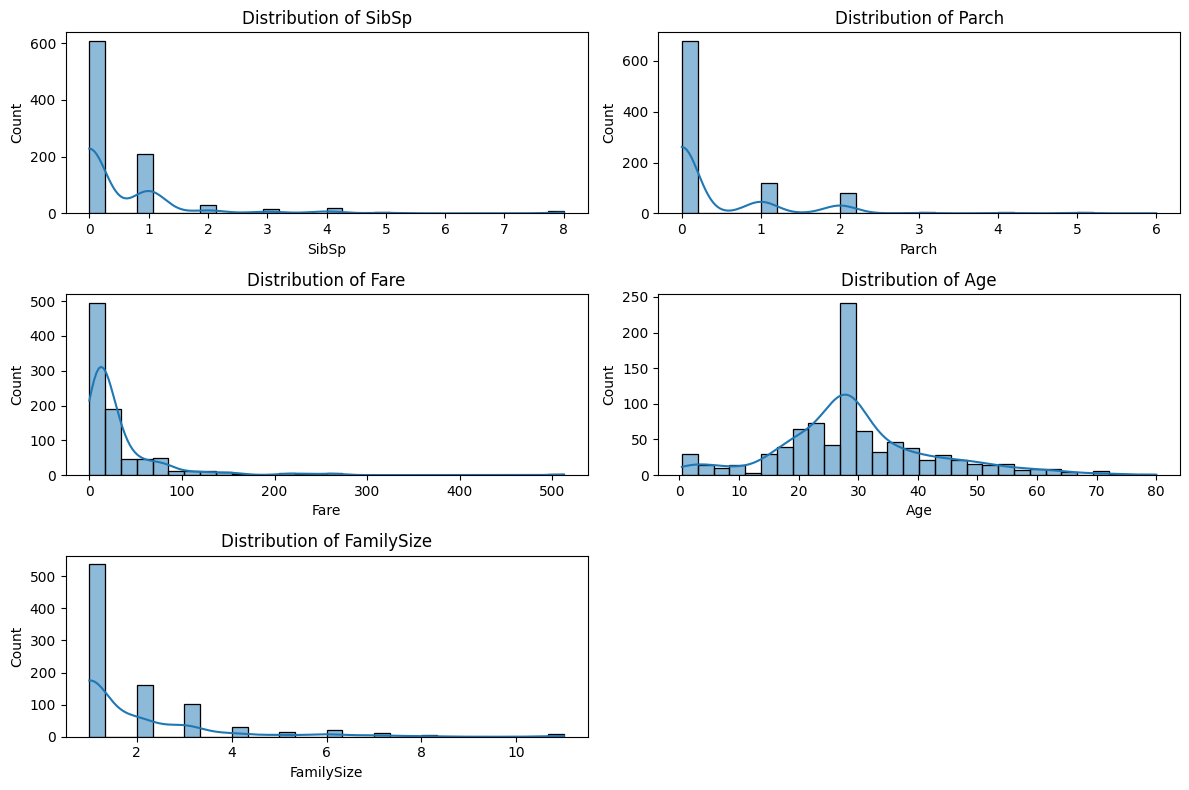

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['SibSp', 'Parch', 'Fare', 'Age','FamilySize']
plt.figure(figsize=(12, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

In [216]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_Freq,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,1,0,3,1,22.0,1,0,7.2500,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2
1,2,1,1,0,38.0,1,0,71.2833,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2
2,3,1,3,0,26.0,0,0,7.9250,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,4,1,1,0,35.0,1,0,53.1000,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2
4,5,0,3,1,35.0,0,0,8.0500,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
887,888,1,1,0,19.0,0,0,30.0000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
888,889,0,3,0,28.0,1,2,23.4500,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4
889,890,1,1,1,26.0,0,0,30.0000,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


# **finding outliers**

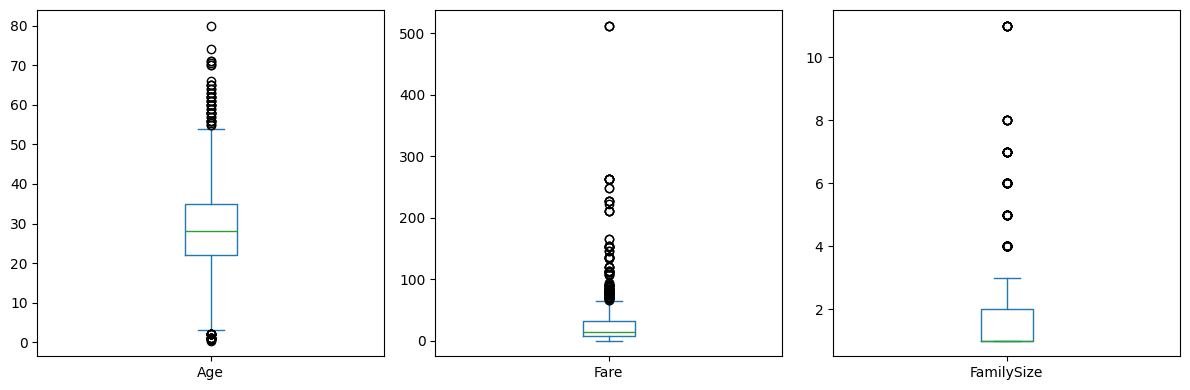

In [217]:
# Create new feature
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Drop unnecessary columns
data.drop(columns=['SibSp', 'Parch', 'PassengerId'], inplace=True)

# Boxplots to check outliers
import matplotlib.pyplot as plt
data[['Age', 'Fare', 'FamilySize']].plot(kind='box', subplots=True, layout=(1, 3), figsize=(12, 4), sharey=False)
plt.tight_layout()
plt.show()

In [220]:
print(data['FamilySize'].value_counts())

FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64


# **Removing outliers**

1.   winsorize feture like age and fare to do not loss information
2.  appling IQR on  FamilySize



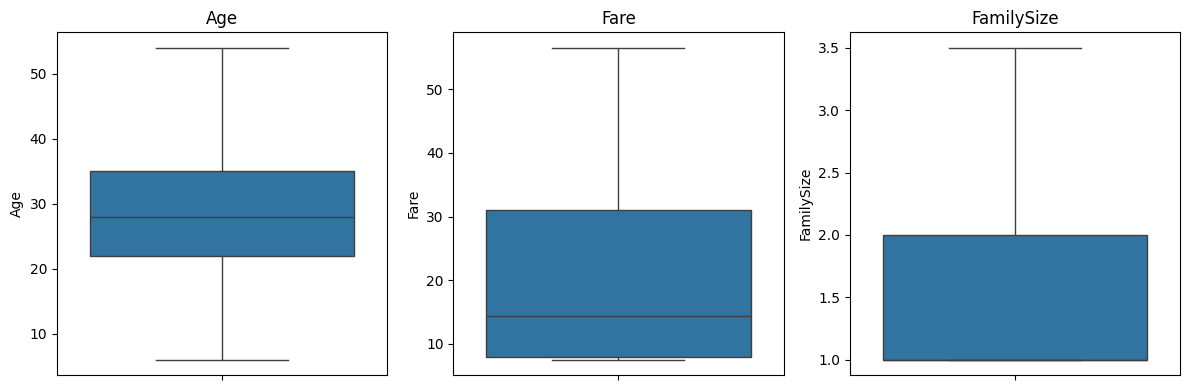

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

# Winsorize Age (strong) and Fare (very strong)
data['Age'] = winsorize(data['Age'], limits=[0.05, 0.05])
data['Fare'] = winsorize(data['Fare'], limits=[0.05, 0.15])

# IQR cap for FamilySize
Q1 = data['FamilySize'].quantile(0.25)
Q3 = data['FamilySize'].quantile(0.75)
IQR = Q3 - Q1
low, high = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
data['FamilySize'] = data['FamilySize'].clip(low, high)

# Plot boxplots
plt.figure(figsize=(12, 4))
for i, col in enumerate(['Age', 'Fare', 'FamilySize']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()



# **finding distribution plots **

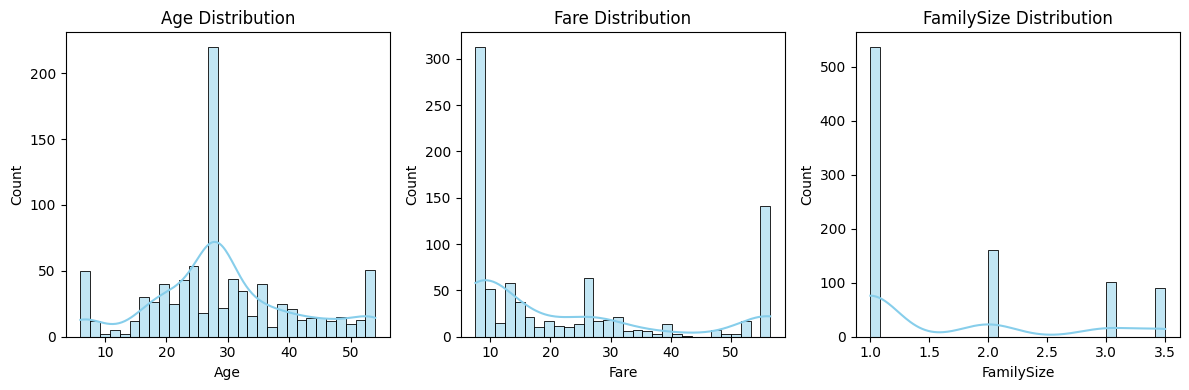

In [224]:
# Plot distribution plots
plt.figure(figsize=(12, 4))
for i, col in enumerate(['Age', 'Fare', 'FamilySize']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

# **Normalizing and standardizing the nemurical features**

1.  applying normiliztion on age
2.  applying standardizion on fare nd familysize



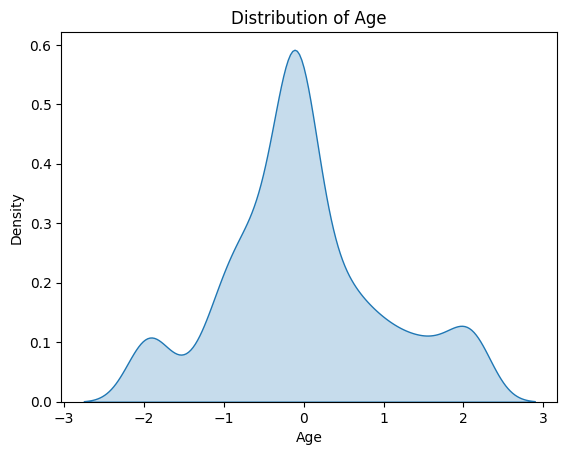

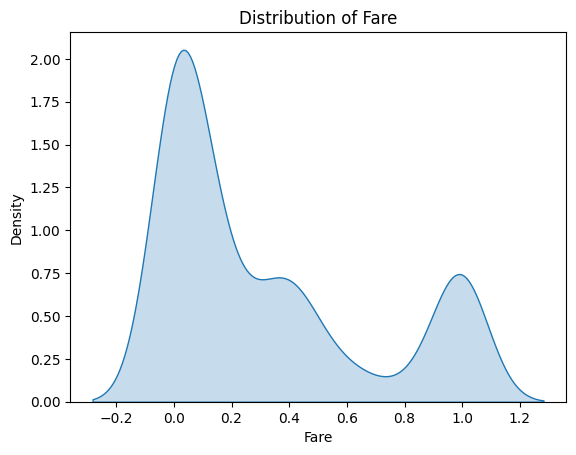

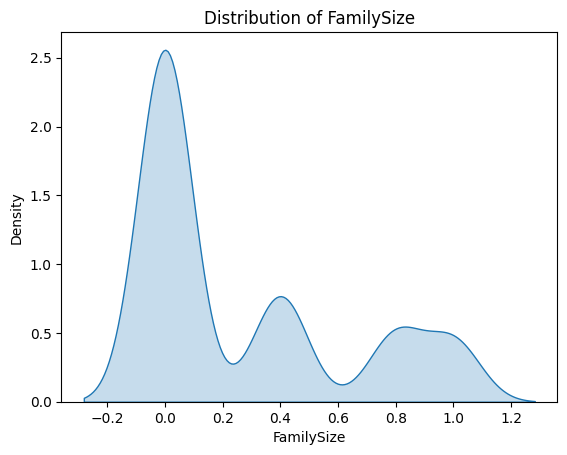

In [229]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Standardize Age
data['Age'] = StandardScaler().fit_transform(data[['Age']])

# Normalize Fare and FamilySize
scaler = MinMaxScaler()
data[['Fare', 'FamilySize']] = scaler.fit_transform(data[['Fare', 'FamilySize']])

# Plot updated distributions
for col in ['Age', 'Fare', 'FamilySize']:
    sns.kdeplot(data[col], fill=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [230]:
data

,Survived,Pclass,Sex,Age,Fare,Ticket_Freq,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,0,3,1,-0.610555,0.000000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.4
1,1,1,0,0.754361,1.000000,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.4
2,1,3,0,-0.269326,0.007662,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0,0.498440,0.930621,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.4
4,0,3,1,0.498440,0.010215,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,-0.184019,0.111348,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
887,1,1,0,-0.866477,0.458671,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
888,0,3,0,-0.098711,0.324849,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
889,1,1,1,-0.269326,0.458671,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
